In [114]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing

# Análise Exploratória sobre os valores de aluguel no Brasil
### Tal análise foi desenvolvida durante um módulo do curso AceleraDev Data Science da [Codenation](https://codenation.dev) nas aulas ministradas pelo professor [Túlio Vieira](https://www.linkedin.com/in/tuliovieira/).

In [6]:
#Create Dataframe
df_houses = pd.read_csv('houses_to_rent_v2.csv')

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

# Explorar o valor do aluguel

## Estatística Univariada

In [8]:
df_houses.rename(columns={'rent amount (R$)' : 'valor_aluguel'},inplace = True)

# Média dos aluguéis

In [12]:
df_houses['valor_aluguel'].mean()

3896.247194163861

# Mediana dos aluguéis

In [15]:
df_houses['valor_aluguel'].median()

2661.0

# Desvio Padrão

In [16]:
df_houses['valor_aluguel'].std()

3408.5455176710675

# Análise Geral

In [19]:
df_houses['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

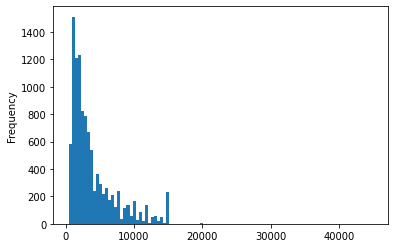

In [112]:
df_houses['valor_aluguel'].plot(kind='hist',bins=100);

In [24]:
# análise skewness
df_houses['valor_aluguel'].skew()

1.8388773035440982

In [25]:
# Kurtosis - Curva Leptocurtica (kurtosis > 0)
df_houses['valor_aluguel'].kurtosis()

4.624228179818687

# Exploração Multivariáveis

### Perguntas

- Qual a cidade com a média de aluguel mais alta?
- Quantos banheiros existem nas residências com aluguéis maiores?
- Os imóveis mais caros aceitam animal?
- Os imóveis mais caros são mobiliados?

In [30]:
#Qual a cidade com a média de aluguel mais alta?
df_houses.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel',ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [34]:
#Quantos banheiros existem em média nas residências com aluguéis maiores?
## definição: alugueis maiores são valores acima de 5000
df_houses['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df_houses['valor_aluguel']]

In [42]:
df_houses.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [55]:
df_houses.groupby(['aluguel_alto','city'])['bathroom'].mean()['Alto']

city
Belo Horizonte    4.148551
Campinas          4.511364
Porto Alegre      3.640449
Rio de Janeiro    2.947598
São Paulo         3.730210
Name: bathroom, dtype: float64

# - Quantos banheiros existem em média nas residências com aluguéis maiores?
## definição: alugueis maiores são valores acima de 5000
### As residências com aluguel maior tem em média 3,7 banheiros, contra 1,7 para alugueis menores. Dentre os maiores alugueis, a região do Rio de Janeiro tem a menor média, sendo Belo Horizonte com a maior.

In [66]:
# Os imóveis mais caros aceitam animal? Qual a porcentagem dos imóveis com os maiores valores aceitam animais?
df_houses.query('aluguel_alto == "Alto" & animal == "acept"').shape[0] / df_houses.query('aluguel_alto == "Alto"').shape[0]

0.8207955888144939

In [69]:
df_houses.query('aluguel_alto == "Alto" & animal == "acept"').groupby('city').count()['animal']

city
Belo Horizonte     224
Campinas            78
Porto Alegre        78
Rio de Janeiro     186
São Paulo         1518
Name: animal, dtype: int64

In [75]:
#Calculo da porcentagem de aceitação por região.
df_houses.query('aluguel_alto == "Alto" & animal == "acept"').groupby('city').count()['animal'] / df_houses.query('aluguel_alto == "Alto"').groupby('city').count()['animal']

city
Belo Horizonte    0.811594
Campinas          0.886364
Porto Alegre      0.876404
Rio de Janeiro    0.812227
São Paulo         0.817447
Name: animal, dtype: float64

# - Os imóveis mais caros aceitam animal? Qual a porcentagem dos imóveis com os maiores valores aceitam animais?
### Dentre os imóveis de maior valor 82% aceitam animais, sendo Campinas (88,6%) a região com maior porcentagem de aceitação e Belo Horizonte (81,1%) a de menor.

In [76]:
#Qual a % dos imóveis com valor maior são mobiliados?
df_houses.query('aluguel_alto == "Alto" & furniture == "furnished"').shape[0] / df_houses.query('aluguel_alto == "Alto"').shape[0]


0.3458054352107129

In [77]:
#Calculo da porcentagem por região.
df_houses.query('aluguel_alto == "Alto" & furniture == "furnished"').groupby('city').count()['furniture'] / df_houses.query('aluguel_alto == "Alto"').groupby('city').count()['furniture']

city
Belo Horizonte    0.199275
Campinas          0.136364
Porto Alegre      0.483146
Rio de Janeiro    0.467249
São Paulo         0.355950
Name: furniture, dtype: float64

# - Qual a % dos imóveis com valor maior são mobiliados?
### Em geral apenas 34% dos imóveis com valor acima de R$5000,00 são mobiliados, sendo a região de Belo Horizonte a que apresenta menor taxa (19,9%) e Porto Alegre a maior (48,3%)

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imóvel maior o valor do aluguel.
- Os imóveis com mobilia tem o aluguel mais alto.

In [80]:
df_houses[['valor_aluguel','bathroom']].corr(method='spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [95]:
aux = pd.DataFrame({'colunas':df_houses.columns,'tipos':df_houses.dtypes})

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [102]:
aux[aux.tipos == 'int64']['colunas']

area                                  area
rooms                                rooms
bathroom                          bathroom
parking spaces              parking spaces
hoa (R$)                          hoa (R$)
valor_aluguel                valor_aluguel
property tax (R$)        property tax (R$)
fire insurance (R$)    fire insurance (R$)
total (R$)                      total (R$)
Name: colunas, dtype: object

In [103]:
lista = list(aux[aux.tipos == 'int64']['colunas'])
lista

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [106]:
#validando correlação entre as variáveis
for coluna in lista:
    print(coluna)
    print(df_houses[['valor_aluguel',coluna]].corr(method='spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

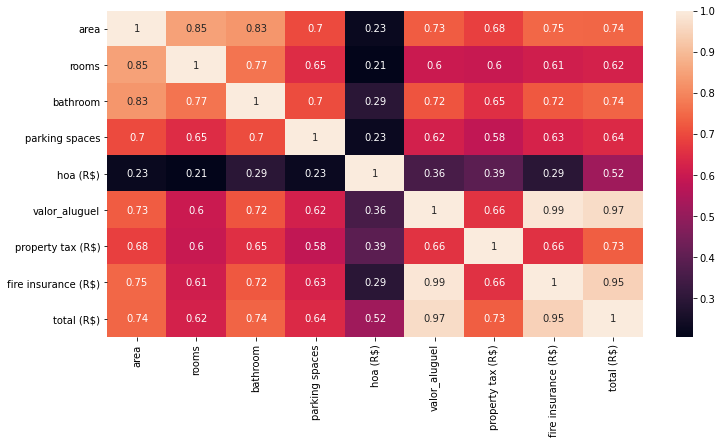

In [131]:
plt.figure(figsize=(12,6))
sns.heatmap(df_houses.corr(method='spearman'), annot=True)

In [136]:
#validando correlação com dataframe normalizado
x = df_houses.select_dtypes(include=['int64','float64']).values
min_max_scaller = preprocessing.MinMaxScaler()
x_scaled = min_max_scaller.fit_transform(x)
df_norm = pd.DataFrame(x_scaled,columns=df_houses.select_dtypes(include=['int64','float64']).columns)
df_norm

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,0.001274,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.057864,0.004573
1,0.006670,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.089021,0.006676
2,0.001490,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.056380,0.002985
3,0.000863,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.020772,0.000824
4,0.000302,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.011869,0.000301
...,...,...,...,...,...,...,...,...,...
10687,0.001123,0.083333,0.000000,0.083333,0.000360,0.023075,0.000077,0.028190,0.001275
10688,0.005915,0.250000,0.333333,0.333333,0.002775,0.326599,0.003102,0.278932,0.016758
10689,0.001274,0.166667,0.222222,0.000000,0.000877,0.124579,0.001058,0.111276,0.006155
10690,0.002353,0.083333,0.111111,0.166667,0.001419,0.259259,0.000889,0.225519,0.012078


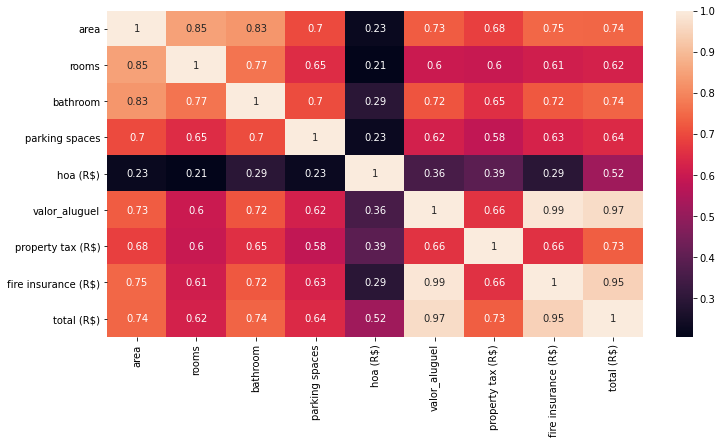

In [132]:
plt.figure(figsize=(12,6))
sns.heatmap(df_norm.corr(method='spearman'),annot=True)